In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ServiceTrain.csv")
df

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,103.388821,103.504032,103.051485,106.172658,105.6868429,No
1,26.765516,26.188265,31.259536,29.186162,31.31127506,Yes
2,62.413282,63.681061,59.720883,64.704031,58.62051752,Yes
3,45.533338,49.906615,48.777581,48.113851,?,No
4,104.388821,103.284032,103.051485,105.822658,106.5368429,No
...,...,...,...,...,...,...
312,104.388821,105.744032,103.051485,105.782658,104.1968429,No
313,63.823282,62.741061,59.720883,61.654031,62.62051752,Yes
314,26.535516,27.418265,31.259536,27.486162,33.31127506,Yes
315,26.215516,26.338265,31.259536,27.036162,31.31127506,Yes


In [2]:
df.isna().sum()

OilQual        0
EnginePerf     1
NormMileage    2
TyreWear       2
HVACwear       1
Service        0
dtype: int64

In [3]:
df.dtypes

OilQual        float64
EnginePerf     float64
NormMileage    float64
TyreWear       float64
HVACwear        object
Service         object
dtype: object

In [4]:
df=df.replace('?',np.NaN)
df.isna().sum()

OilQual        0
EnginePerf     1
NormMileage    2
TyreWear       2
HVACwear       2
Service        0
dtype: int64

In [5]:
avg1 = df["EnginePerf"].astype('float').mean()
avg2 = df["NormMileage"].astype('float').mean()
avg3 = df["TyreWear"].astype('float').mean()
mode = df["HVACwear"].astype('str').mode()
df['EnginePerf'].replace(np.NaN,avg1,inplace=True)
df['NormMileage'].replace(np.NaN,avg2,inplace=True)
df['TyreWear'].replace(np.NaN,avg3,inplace=True)
df['HVACwear'].replace(np.NaN,mode.iloc[0],inplace=True)

In [6]:
df.isna().sum()

OilQual        0
EnginePerf     0
NormMileage    0
TyreWear       0
HVACwear       0
Service        0
dtype: int64

C:\Users\admin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OilQual'>

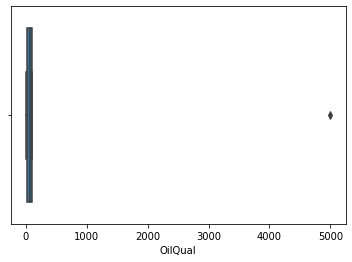

In [13]:
sns.boxplot(df["OilQual"])

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [15]:
lowoilqual,upperoilqual=remove_outlier(df['OilQual'])
df['OilQual']=np.where(df['OilQual']>upperoilqual,upperoilqual,df['OilQual'])
df['OilQual']=np.where(df['OilQual']<lowoilqual,lowoilqual,df['OilQual'])

In [16]:
Enc_Service = []
for i in df["Service"]:
    if(i=="Yes"):
        Enc_Service.append(1)
    elif(i=="No"):
        Enc_Service.append(0)
df["Encoded Service"] = Enc_Service
df = df.drop(['Service'],axis=1)

In [17]:
df.head()

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Encoded Service
0,103.388821,103.504032,103.051485,106.172658,105.6868429,0
1,26.765516,26.188265,31.259536,29.186162,31.31127506,1
2,62.413282,63.681061,59.720883,64.704031,58.62051752,1
3,45.533338,49.906615,48.777581,48.113851,105.5368429,0
4,104.388821,103.284032,103.051485,105.822658,106.5368429,0


In [18]:
from sklearn.model_selection import train_test_split
X=df[['OilQual', 'EnginePerf', 'NormMileage', 'TyreWear', 'HVACwear']]
y=df['Encoded Service']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [20]:
from sklearn import metrics
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred))*100,'%')

Accuracy: 100.0 %


In [21]:
clf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)